<a href="https://colab.research.google.com/github/VineethChitta80/advance_face_recognition_system/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from google.colab import drive
from pathlib import Path
import shutil
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import cv2

In [ ]:
# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def my_label(image_name):
    name = image_name.split('(')[-2]
    name = name.split('/')[-1]
    if name=="y ":
        return np.array([1,0,0,0,0])
    elif name=="n ":
        return np.array([0,1,0,0,0])
    elif name=="Malignant case ":
        return np.array([0,0,1,0,0])
    elif name=="Normal case ":
        return np.array([0,0,0,1,0])
    elif name=="Bengin case ":
        return np.array([0,0,0,0,1])

In [ ]:
# Function to extract features from an image
def extract_features(image):
    #x = image.img_to_array(img)
    x = np.expand_dims(image, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

In [ ]:
def my_data(path):
    image_files = list(Path(path).glob('*.jpg')) + list(Path(path).glob('*.jpeg')) + list(Path(path).glob('*.png'))
    data = []
    image_paths = []
    for image_file in image_files:
      image_paths.append(str(image_file))
    for image_path in image_paths:
        img_data = cv2.imread(image_path)
        img_data = cv2.resize(img_data, (224,224))
        if my_label(image_path) is not None:
          data.append([np.array(img_data), my_label(image_path)]);
    return data

In [ ]:
train_datas = my_data('/content/drive/MyDrive/Colab Notebooks/DATASET')
for i in train_datas:
 print(i[1])

[0 1 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0

In [ ]:
def features(data_list) :
  features_list = []
  for img,label in data_list:
    features = extract_features(img)
    features_list.append(features)
  return features_list

In [ ]:
import numpy as np
from scipy.spatial import distance

In [ ]:
def euclidean_image_similarity(image_feature1,image_feature2):
  euclidean_dist = distance.euclidean(image_feature1, image_feature2)
  return euclidean_dist

In [ ]:
def cosine_image_similarity(image_feature1,image_feature2):
  cosine_dist = cosine(image_feature1, image_feature2)
  return cosine_dist

1/1 [==============================] - 0s 23ms/step
[0.        0.        0.        ... 0.        0.8500008 0.       ]


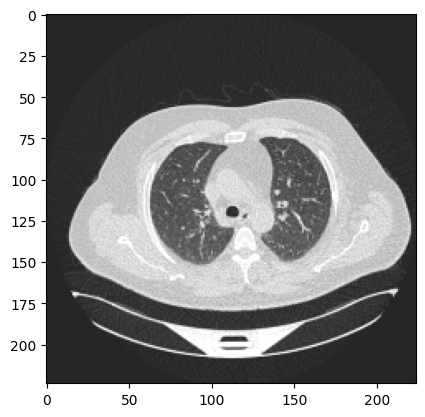

In [ ]:
query_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test_dataset/Bengin case (100).jpg')
query_image = cv2.resize(query_image,(224,224))
query_image_features = extract_features(query_image)
plt.imshow(query_image)
print(query_image_features)

In [ ]:
features_list = features(train_datas)

1/1 [==============================] - 0s 28ms/step


In [ ]:
def similar_images(query_image):
  similar_images = []
  index = 0
  for features in features_list:
    dist = cosine_image_similarity(query_image,features)
    similar_images.append([dist,index])
    index+=1
  return sorted(similar_images)

In [ ]:
similar_img = similar_images(query_image_features)
print(similar_img)

[[0.23561835289001465, 919], [0.24037432670593262, 136], [0.25404417514801025, 878], [0.2591633200645447, 940], [0.26119107007980347, 925], [0.2612886428833008, 938], [0.2633175253868103, 931], [0.2679416537284851, 650], [0.2683038115501404, 922], [0.26977109909057617, 941], [0.2744322419166565, 631], [0.2769699692726135, 639], [0.27944910526275635, 671], [0.2840261459350586, 930], [0.2840721607208252, 732], [0.28410637378692627, 882], [0.2846846580505371, 790], [0.2868204712867737, 733], [0.2869817018508911, 747], [0.29330432415008545, 657], [0.29557549953460693, 734], [0.2955804467201233, 675], [0.295817494392395, 759], [0.29615306854248047, 907], [0.29756414890289307, 116], [0.29801326990127563, 850], [0.2994723320007324, 151], [0.2996838688850403, 620], [0.3002853989601135, 803], [0.3039931654930115, 612], [0.30522894859313965, 676], [0.30642032623291016, 738], [0.30646973848342896, 884], [0.30988097190856934, 702], [0.3099139928817749, 700], [0.3103715181350708, 913], [0.311764955

[0 0 0 1 0]
[0 0 0 0 1]
[0 0 0 1 0]
[0 0 0 1 0]
[0 0 0 1 0]
[0 0 0 1 0]
[0 0 0 1 0]
[0 0 0 1 0]
[0 0 0 1 0]
[0 0 0 1 0]


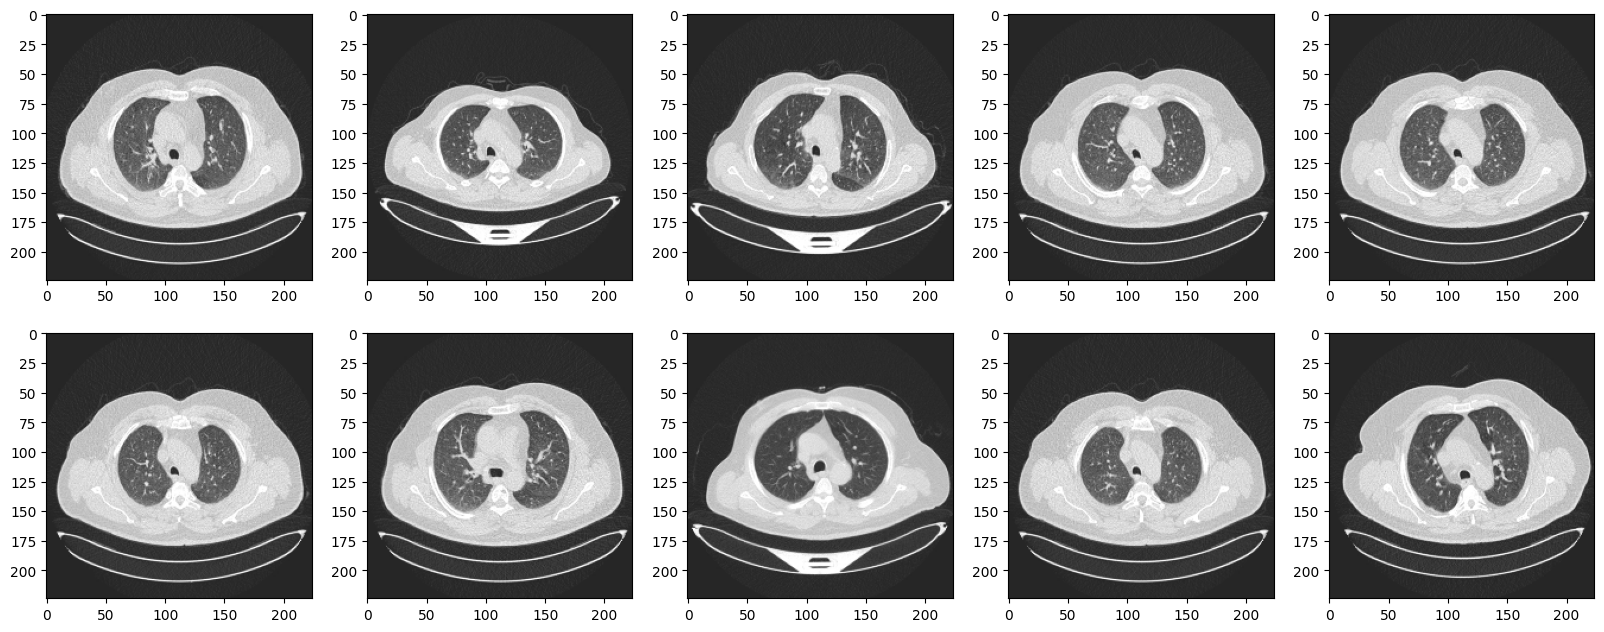

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(10):
  y = fig.add_subplot(5,5, i+1)
  print(train_datas[similar_img[i][1]][1])
  y.imshow(train_datas[similar_img[i][1]][0])
plt.show()

In [ ]:
test_datas =  my_data('/content/drive/MyDrive/Colab Notebooks/test_dataset')
for test_data in test_datas:
  print(test_data[1])

[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0

In [ ]:
def accuracy(test_datas,train_data):
  accuracy_vector = []
  for test_data in test_datas:
    test_image_feature = extract_features(test_data[0])
    similar_img = similar_images(test_image_feature)
    labels = []
    for i in range(5):
      labels.append(train_datas[similar_img[i][1]][1])
    count = 0
    for label in labels:
      k = 0
      while k<5:
        if label[k] == test_data[1][k]:
          k+=1
        else:
          break
      if k==5:
        count+=1
    accuracy_vector.append(count/10.0)
  return accuracy_vector

values = accuracy(test_datas,train_datas)

NameError: ignored

In [ ]:
print(values)

[0.9, 0.6, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.9, 0.7, 0.9, 0.9, 0.7, 0.8, 1.0, 0.9, 1.0, 0.2, 0.6, 0.9, 0.2, 0.9, 1.0, 0.7, 0.7, 0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.4, 0.6, 0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 1.0, 0.3, 0.1, 0.1, 0.1, 0.5, 1.0, 0.4, 0.1, 1.0, 0.1, 0.2, 0.4, 0.3, 0.2, 0.5, 0.6, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.8, 0.7, 0.9, 1.0, 0.7, 0.8, 0.7, 1.0, 0.7, 0.6, 0.7, 1.0, 0.8, 1.0, 0.9, 1.0, 0.7, 0.8, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 0.9, 1.0, 0.9, 0.9, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 0.6, 1.0, 0.9, 0.8, 0.7, 0.8, 0.4, 0.7, 0.9, 1.0, 0.9, 0.7, 0.7, 1.0, 0.7, 0.9, 0.7, 0.8, 1.0, 0.8, 0.4, 0.9, 0.7, 1.0, 1.0, 1.0, 0.3, 0.6, 1.0, 1.0, 1.0, 0.6, 0.9, 0.1, 0.9, 0.6, 1.0, 0.9, 1.0, 1.0, 0.8, 1.0, 0.0, 0.8, 0.5, 0.0, 0.7, 1.0, 0.6, 0.6, 0.8, 0.9, 0.8, 0.7, 0.5, 0.8, 0.4, 0.8, 0.9, 0.6, 0.7, 0.9, 0.7, 0.8, 1.0, 0.6, 0.5, 1.0, 1.0, 0.7, 0.5, 1.0, 0.9, 0.5, 0.4, 0.8, 0.9, 1.0, 0.7, 1.0, 0.1, 0.3, 1.0, 0.2, 1.0, 1.0, 0.9, 0.3, 1.0, 0.6, 0.4, 1.0, 0.5, 0.5,

In [ ]:
sum=0
for value in values:
  sum+=value
print("accuracy = ",sum*100/len(values))

accuracy =  69.31654676258997
